# Project 2
Question: Is there any correlation between birth rate and extreme temperature variations?
Ha: Extreme temperature affects birth rate
H0: There is no correlation between birth rate and temperature. 

The following needs to be fixed in the dataset: 
1) Need to find the correct weight and height figures for children. 
2) Replace weight<4kg with mean value because there is a suspected data entry error

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_excel('/Users/KiraEvsanaa/Desktop/ECON628-01-KIRAEVSANAA/datasets/Bangladesh.xls')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 57 columns):
bidx                       2147 non-null int64
hh_id                      2147 non-null int64
year                       2147 non-null int64
month                      2147 non-null int64
maxT                       2147 non-null float64
extremeT                   2147 non-null float64
Births                     2147 non-null int64
v013                       2147 non-null object
v024                       2147 non-null object
v025                       2147 non-null object
v026                       2147 non-null object
education                  2147 non-null object
yrsofedu                   2147 non-null float64
literacy                   2140 non-null object
electricity                2136 non-null object
religion                   2147 non-null object
v133                       2143 non-null float64
location                   2147 non-null object
hhsize                     214

In [4]:
df.shape

(2147, 57)

In [5]:
df.isnull().sum()

bidx                           0
hh_id                          0
year                           0
month                          0
maxT                           0
extremeT                       0
Births                         0
v013                           0
v024                           0
v025                           0
v026                           0
education                      0
yrsofedu                       0
literacy                       7
electricity                   11
religion                       0
v133                           4
location                       0
hhsize                         0
nmbrofwomen                    0
edustatus                      0
nmbrbirths                     0
v206                           0
v207                           0
age                            0
nmbrkids                       0
abortion                       0
hhoccupation                   2
workstatus                     0
bord                           0
livingkids

In [6]:
df.drop(['v026','v133','v013','v207','religion1', 'work', 'location1','abortion1','ratio','fsresid','monthdta','conception','religions','literacy1','v024'], axis=1, inplace=True)
df

,bidx,hh_id,year,month,maxT,extremeT,Births,v025,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding in months,Prolonged labour,Marriage.age,Class.grade
0,1,537,95,10,87.6673,92.8364,71,rural,no education,3.19347,...,pill,no education,10,6.0,61.0,female,6.0,no,16.0,2.0
1,1,23,94,10,91.2000,94.0000,92,urban,no education,3.19347,...,not usin,no education,10,54.0,169.0,female,12.0,no,14.0,NaN
2,1,92,95,6,87.6673,92.8364,58,rural,primary,5.00000,...,pill,primary,6,1.0,33.0,male,1.0,yes,12.0,1.0
3,2,92,93,8,87.6673,92.8364,89,rural,primary,5.00000,...,not usin,primary,8,40.0,105.0,female,40.0,no,13.0,4.0
4,3,92,92,8,87.6673,92.8364,67,rural,primary,5.00000,...,not usin,primary,8,50.0,307.0,female,1.0,no,16.0,NaN
5,1,213,94,1,87.6673,92.8364,123,rural,secondary,1.00000,...,pill,secondary,1,47.0,105.0,female,47.0,no,14.0,5.0
6,1,87,94,10,91.2000,94.0000,92,rural,primary,5.00000,...,periodic,primary,10,45.0,157.0,female,3.0,yes,13.0,NaN
7,2,45,91,10,87.6673,92.8364,88,rural,no education,3.19347,...,condom,no education,10,3.0,51.0,male,3.0,no,15.0,NaN
8,1,22,94,10,91.2000,94.0000,92,rural,primary,4.00000,...,not usin,primary,10,9.0,68.0,male,9.0,no,16.0,2.0
9,1,67,93,10,87.6673,92.8364,120,rural,no education,3.19347,...,not usin,no education,10,53.0,125.0,male,36.0,no,12.0,2.0


In [7]:
df.isnull().sum()

bidx                           0
hh_id                          0
year                           0
month                          0
maxT                           0
extremeT                       0
Births                         0
v025                           0
education                      0
yrsofedu                       0
literacy                       7
electricity                   11
religion                       0
location                       0
hhsize                         0
nmbrofwomen                    0
edustatus                      0
nmbrbirths                     0
v206                           0
age                            0
nmbrkids                       0
abortion                       0
hhoccupation                   2
workstatus                     0
bord                           0
livingkids                     0
hh_yrsofedu                    0
birthcntrl                     0
missingyrsofedu                0
lnBirths                       0
age2      

In [8]:
df.rename(columns={
        'Breastfeeding\nin months':'Breastfeeding_in_months',
        'Prolonged\nlabour':'Prolonged_labour',
        'Marriage.age':'Marriage_age_mom',
        'Class.grade': 'Highest_class_grade_child',
        'v025':'household_location',
    }, inplace=True) 
df

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
0,1,537,95,10,87.6673,92.8364,71,rural,no education,3.19347,...,pill,no education,10,6.0,61.0,female,6.0,no,16.0,2.0
1,1,23,94,10,91.2000,94.0000,92,urban,no education,3.19347,...,not usin,no education,10,54.0,169.0,female,12.0,no,14.0,NaN
2,1,92,95,6,87.6673,92.8364,58,rural,primary,5.00000,...,pill,primary,6,1.0,33.0,male,1.0,yes,12.0,1.0
3,2,92,93,8,87.6673,92.8364,89,rural,primary,5.00000,...,not usin,primary,8,40.0,105.0,female,40.0,no,13.0,4.0
4,3,92,92,8,87.6673,92.8364,67,rural,primary,5.00000,...,not usin,primary,8,50.0,307.0,female,1.0,no,16.0,NaN
5,1,213,94,1,87.6673,92.8364,123,rural,secondary,1.00000,...,pill,secondary,1,47.0,105.0,female,47.0,no,14.0,5.0
6,1,87,94,10,91.2000,94.0000,92,rural,primary,5.00000,...,periodic,primary,10,45.0,157.0,female,3.0,yes,13.0,NaN
7,2,45,91,10,87.6673,92.8364,88,rural,no education,3.19347,...,condom,no education,10,3.0,51.0,male,3.0,no,15.0,NaN
8,1,22,94,10,91.2000,94.0000,92,rural,primary,4.00000,...,not usin,primary,10,9.0,68.0,male,9.0,no,16.0,2.0
9,1,67,93,10,87.6673,92.8364,120,rural,no education,3.19347,...,not usin,no education,10,53.0,125.0,male,36.0,no,12.0,2.0


In [9]:
df['kg'].fillna(df['kg'].mean(), inplace=True)
df['cm'].fillna(df['cm'].mean(), inplace=True)
df
#There is obviously data entry error from DHS. Birth weight for some babies are 1.00kg and surviving. 

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
0,1,537,95,10,87.6673,92.8364,71,rural,no education,3.19347,...,pill,no education,10,6.000000,61.000000,female,6.0,no,16.0,2.0
1,1,23,94,10,91.2000,94.0000,92,urban,no education,3.19347,...,not usin,no education,10,54.000000,169.000000,female,12.0,no,14.0,NaN
2,1,92,95,6,87.6673,92.8364,58,rural,primary,5.00000,...,pill,primary,6,1.000000,33.000000,male,1.0,yes,12.0,1.0
3,2,92,93,8,87.6673,92.8364,89,rural,primary,5.00000,...,not usin,primary,8,40.000000,105.000000,female,40.0,no,13.0,4.0
4,3,92,92,8,87.6673,92.8364,67,rural,primary,5.00000,...,not usin,primary,8,50.000000,307.000000,female,1.0,no,16.0,NaN
5,1,213,94,1,87.6673,92.8364,123,rural,secondary,1.00000,...,pill,secondary,1,47.000000,105.000000,female,47.0,no,14.0,5.0
6,1,87,94,10,91.2000,94.0000,92,rural,primary,5.00000,...,periodic,primary,10,45.000000,157.000000,female,3.0,yes,13.0,NaN
7,2,45,91,10,87.6673,92.8364,88,rural,no education,3.19347,...,condom,no education,10,3.000000,51.000000,male,3.0,no,15.0,NaN
8,1,22,94,10,91.2000,94.0000,92,rural,primary,4.00000,...,not usin,primary,10,9.000000,68.000000,male,9.0,no,16.0,2.0
9,1,67,93,10,87.6673,92.8364,120,rural,no education,3.19347,...,not usin,no education,10,53.000000,125.000000,male,36.0,no,12.0,2.0


In [10]:
df['Marriage_age_mom'].fillna(df['Marriage_age_mom'].mean(), inplace=True)
df['Highest_class_grade_child'].fillna(df['Highest_class_grade_child'].mean(), inplace=True)
df['Breastfeeding_in_months'].fillna(df['Breastfeeding_in_months'].mean(), inplace=True)
df

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
0,1,537,95,10,87.6673,92.8364,71,rural,no education,3.19347,...,pill,no education,10,6.000000,61.000000,female,6.000000,no,16.0,2.00000
1,1,23,94,10,91.2000,94.0000,92,urban,no education,3.19347,...,not usin,no education,10,54.000000,169.000000,female,12.000000,no,14.0,4.92692
2,1,92,95,6,87.6673,92.8364,58,rural,primary,5.00000,...,pill,primary,6,1.000000,33.000000,male,1.000000,yes,12.0,1.00000
3,2,92,93,8,87.6673,92.8364,89,rural,primary,5.00000,...,not usin,primary,8,40.000000,105.000000,female,40.000000,no,13.0,4.00000
4,3,92,92,8,87.6673,92.8364,67,rural,primary,5.00000,...,not usin,primary,8,50.000000,307.000000,female,1.000000,no,16.0,4.92692
5,1,213,94,1,87.6673,92.8364,123,rural,secondary,1.00000,...,pill,secondary,1,47.000000,105.000000,female,47.000000,no,14.0,5.00000
6,1,87,94,10,91.2000,94.0000,92,rural,primary,5.00000,...,periodic,primary,10,45.000000,157.000000,female,3.000000,yes,13.0,4.92692
7,2,45,91,10,87.6673,92.8364,88,rural,no education,3.19347,...,condom,no education,10,3.000000,51.000000,male,3.000000,no,15.0,4.92692
8,1,22,94,10,91.2000,94.0000,92,rural,primary,4.00000,...,not usin,primary,10,9.000000,68.000000,male,9.000000,no,16.0,2.00000
9,1,67,93,10,87.6673,92.8364,120,rural,no education,3.19347,...,not usin,no education,10,53.000000,125.000000,male,36.000000,no,12.0,2.00000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bidx,2147.0,1.404751,0.626858,1.000000,1.000000,1.000000,2.000000,4.000000
hh_id,2147.0,139.108989,118.638621,1.000000,46.000000,98.000000,210.000000,555.000000
year,2147.0,93.221705,1.867522,90.000000,92.000000,93.000000,95.000000,96.000000
month,2147.0,7.035398,3.717250,1.000000,3.000000,8.000000,10.000000,12.000000
maxT,2147.0,87.324446,2.685454,77.900000,87.667300,87.667300,87.667300,97.100000
extremeT,2147.0,92.341458,3.127576,81.000000,92.836400,92.836400,92.836400,103.000000
Births,2147.0,89.357243,29.741735,32.000000,65.500000,86.000000,115.000000,173.000000
yrsofedu,2147.0,3.193470,1.023272,0.000000,3.193470,3.193470,3.193470,7.000000
hhsize,2147.0,6.087564,2.443351,2.000000,4.000000,6.000000,7.000000,16.000000
nmbrofwomen,2147.0,1.241733,0.554378,1.000000,1.000000,1.000000,1.000000,5.000000


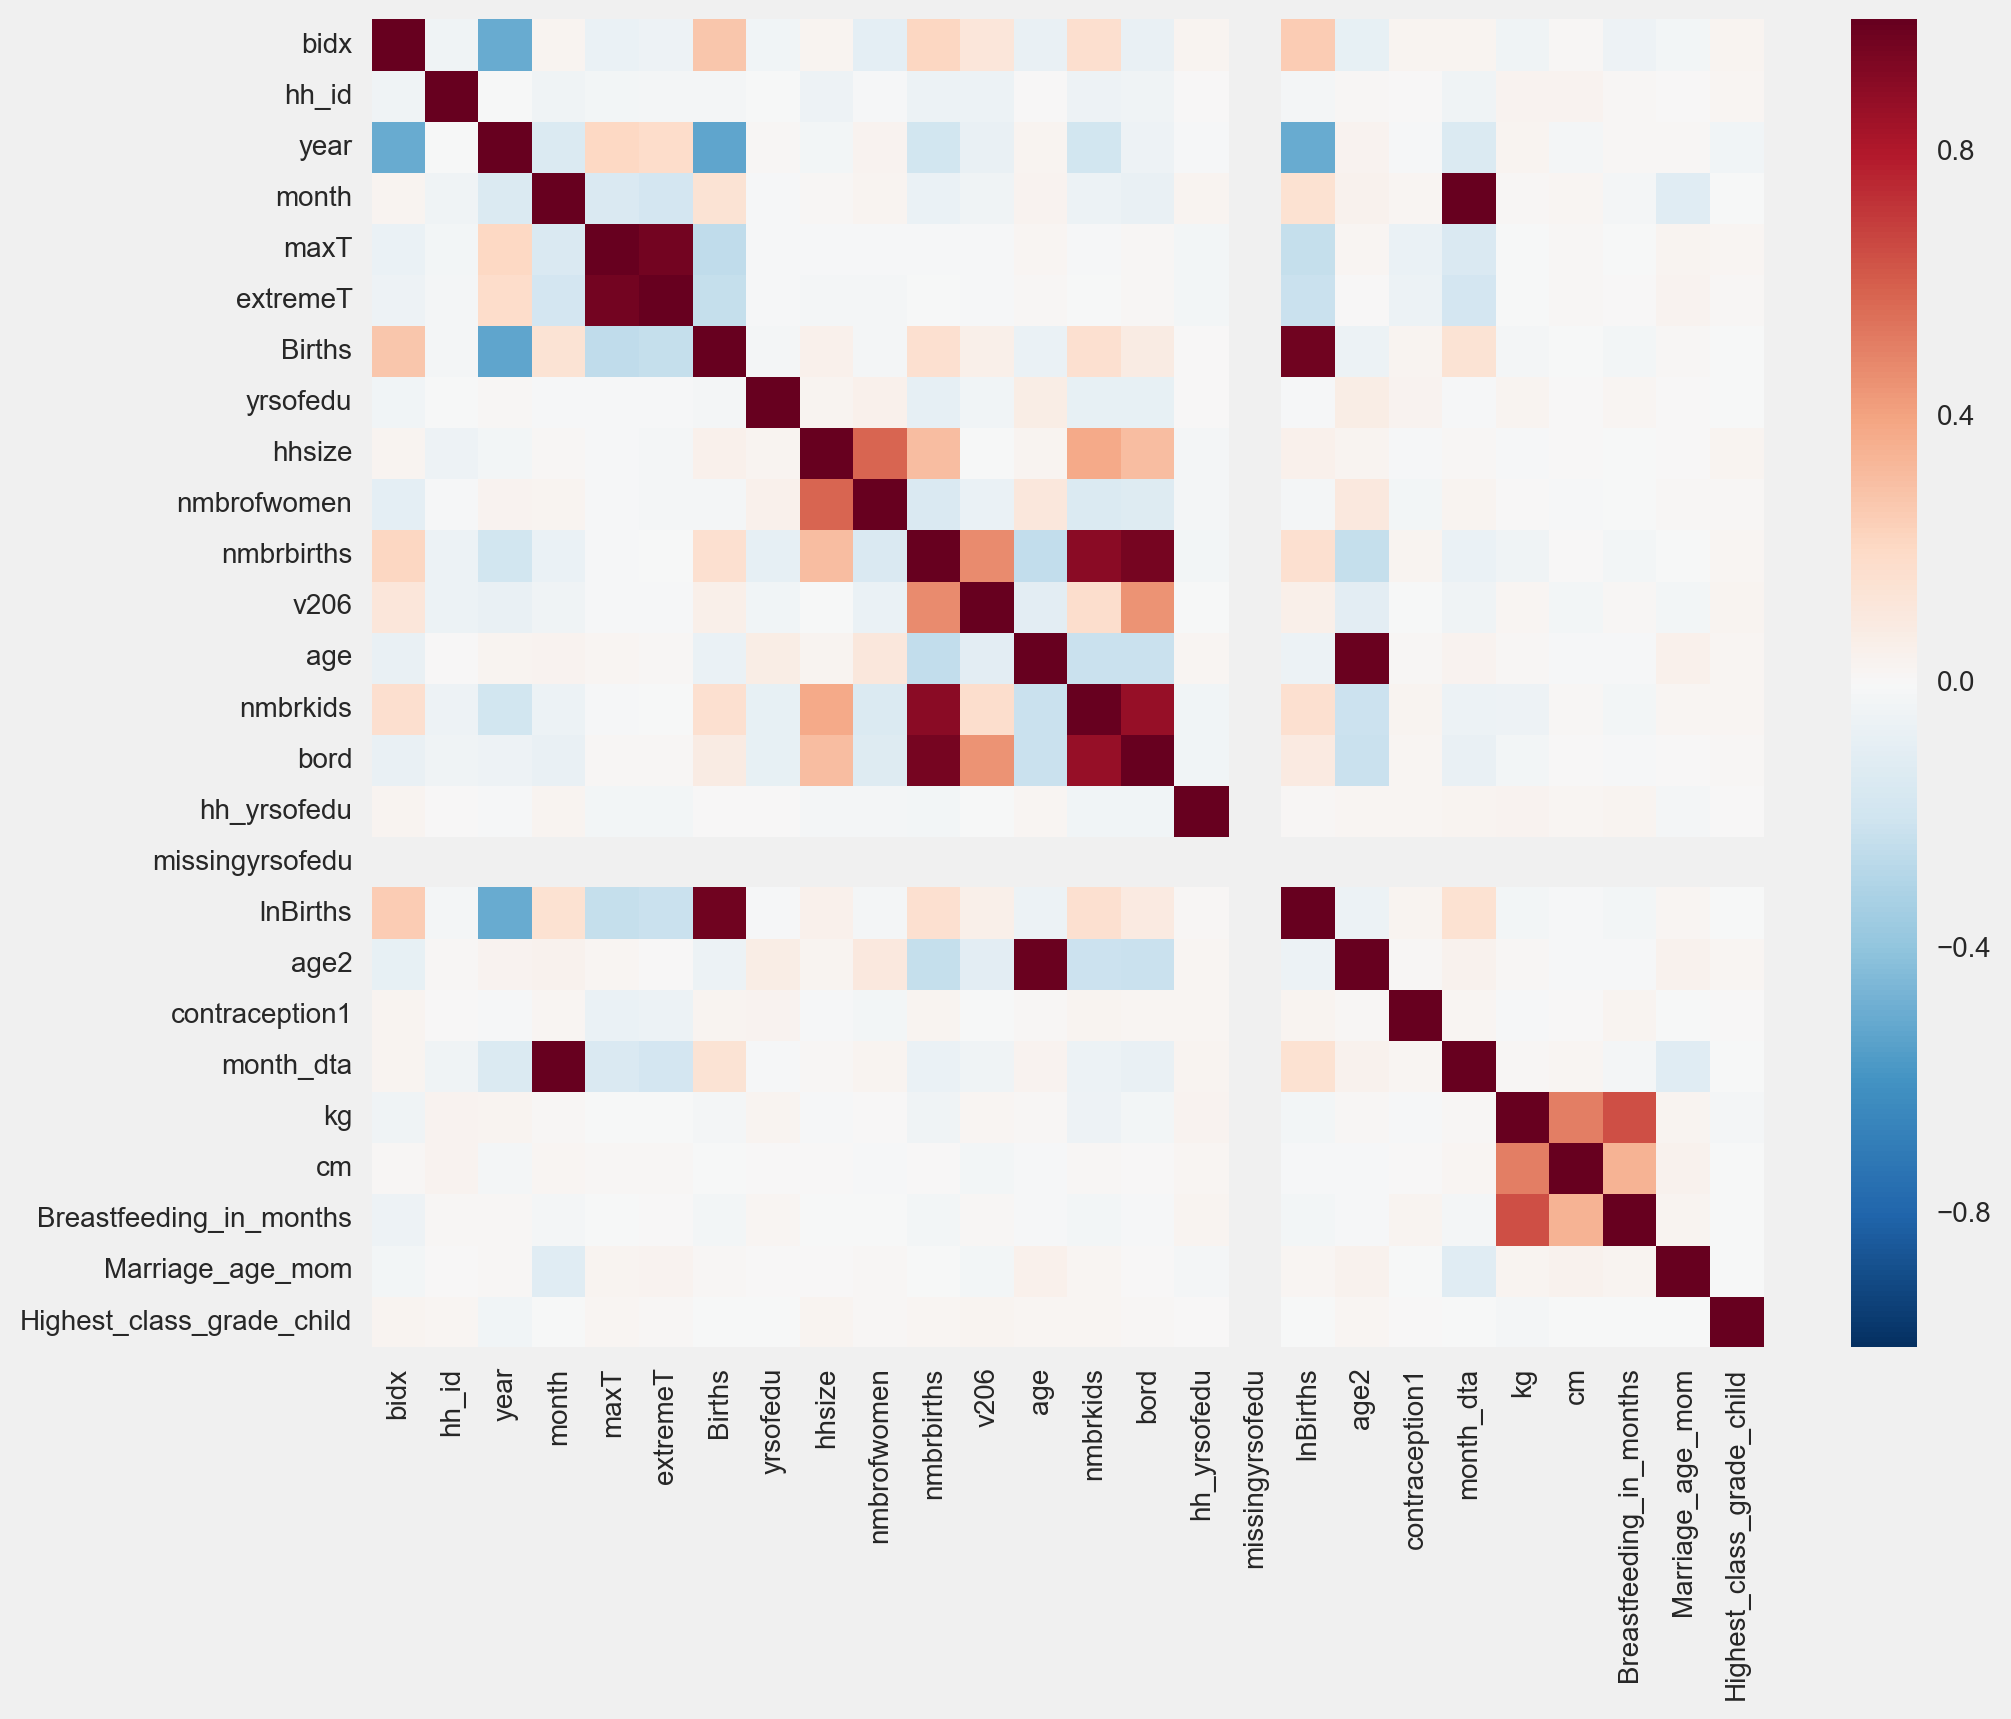

In [12]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df.corr(), ax=ax)
plt.show()

In [13]:
df.corr()

,bidx,hh_id,year,month,maxT,extremeT,Births,yrsofedu,hhsize,nmbrofwomen,...,missingyrsofedu,lnBirths,age2,contraception1,month_dta,kg,cm,Breastfeeding_in_months,Marriage_age_mom,Highest_class_grade_child
bidx,1.000000,-0.042925,-0.502600,0.026245,-0.069162,-0.051416,0.275472,-0.034549,0.028570,-0.099314,...,NaN,0.257052,-0.078691,0.023654,0.026245,-0.042133,0.011409,-0.051490,-0.030991,0.028780
hh_id,-0.042925,1.000000,-0.001901,-0.042609,-0.024446,-0.017797,-0.016805,-0.003958,-0.053644,-0.011836,...,NaN,-0.018340,0.008925,0.001358,-0.042609,0.033272,0.038430,0.007832,0.001651,0.022001
year,-0.502600,-0.001901,1.000000,-0.141153,0.204290,0.180098,-0.528038,0.010443,-0.026111,0.038228,...,NaN,-0.501910,0.032590,-0.015594,-0.141153,0.026391,-0.020571,0.011874,0.013093,-0.033520
month,0.026245,-0.042609,-0.141153,1.000000,-0.155808,-0.187423,0.147220,-0.013735,0.009663,0.023885,...,NaN,0.154405,0.040603,0.016478,1.000000,0.009513,0.018363,-0.021175,-0.117358,-0.003773
maxT,-0.069162,-0.024446,0.204290,-0.155808,1.000000,0.963301,-0.250380,-0.008752,-0.014895,-0.014394,...,NaN,-0.237172,0.015634,-0.062567,-0.155808,-0.007362,0.011624,-0.003273,0.028954,0.019068
extremeT,-0.051416,-0.017797,0.180098,-0.187423,0.963301,1.000000,-0.238389,-0.008054,-0.017728,-0.022777,...,NaN,-0.222588,0.006192,-0.057094,-0.187423,-0.004728,0.015307,0.002014,0.033463,0.015346
Births,0.275472,-0.016805,-0.528038,0.147220,-0.250380,-0.238389,1.000000,-0.016248,0.047765,-0.016516,...,NaN,0.975782,-0.060169,0.023835,0.147220,-0.019293,-0.003416,-0.026150,0.010225,-0.007802
yrsofedu,-0.034549,-0.003958,0.010443,-0.013735,-0.008752,-0.008054,-0.016248,1.000000,0.029110,0.047661,...,NaN,-0.015489,0.074172,0.037484,-0.013735,0.029933,0.007545,0.021953,0.007072,-0.003653
hhsize,0.028570,-0.053644,-0.026111,0.009663,-0.014895,-0.017728,0.047765,0.029110,1.000000,0.583986,...,NaN,0.048604,0.026592,-0.011081,0.009663,-0.010204,0.002448,-0.007057,0.002818,0.028678
nmbrofwomen,-0.099314,-0.011836,0.038228,0.023885,-0.014394,-0.022777,-0.016516,0.047661,0.583986,1.000000,...,NaN,-0.015880,0.108513,-0.031115,0.023885,0.006563,-0.009704,-0.007124,0.012708,0.010594


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [15]:
#Here I am trying to see the mean weight and height of children born in each months. DHS wights and heights are 
#measured by 1 decimal. Please scroll below for conversion. 
df.groupby(['month', 'kg', 'cm'], sort=True)[['Breastfeeding_in_months']].mean().sort_values(by=['Breastfeeding_in_months'], ascending=False).reset_index()

,month,kg,cm,Breastfeeding_in_months
0,9,59.0,115.000000,59.0
1,11,59.0,119.000000,59.0
2,9,58.0,119.000000,58.0
3,7,58.0,99.000000,58.0
4,9,58.0,122.000000,58.0
5,9,57.0,117.000000,57.0
6,2,57.0,118.000000,57.0
7,2,57.0,90.000000,57.0
8,1,57.0,115.000000,57.0
9,9,55.0,126.000000,55.0


In [16]:
#sorting df with less than 4 kg. There is a data entry error. 
df[df['kg'] <4]

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
2,1,92,95,6,87.6673,92.8364,58,rural,primary,5.00000,...,pill,primary,6,1.0,33.000000,male,1.0,yes,12.000000,1.00000
7,2,45,91,10,87.6673,92.8364,88,rural,no education,3.19347,...,condom,no education,10,3.0,51.000000,male,3.0,no,15.000000,4.92692
16,3,67,90,11,85.8000,90.0000,173,rural,no education,3.19347,...,not usin,no education,11,2.0,44.000000,male,2.0,no,19.000000,4.92692
25,1,74,92,12,78.9000,82.0000,105,rural,no education,3.19347,...,periodic,no education,12,1.0,33.000000,male,1.0,yes,13.000000,9.00000
44,1,257,95,2,87.6673,92.8364,72,rural,no education,3.19347,...,not usin,no education,2,3.0,505.000000,male,3.0,yes,14.000000,10.00000
53,1,55,95,3,87.6673,92.8364,63,rural,no education,3.19347,...,pill,no education,3,0.0,28.000000,male,0.0,no,14.000000,4.92692
58,2,38,93,3,87.6673,92.8364,76,rural,no education,3.19347,...,not usin,no education,3,2.0,27.000000,male,2.0,no,13.000000,4.92692
69,1,194,96,7,91.0000,93.0000,64,rural,no education,3.19347,...,not usin,no education,7,0.0,28.000000,male,0.0,no,13.000000,1.00000
72,1,45,93,8,87.6673,92.8364,89,rural,no education,3.19347,...,injectio,no education,8,2.0,36.000000,male,2.0,yes,16.000000,9.00000
84,2,212,94,10,91.2000,94.0000,92,rural,primary,2.00000,...,not usin,primary,10,1.0,60.000000,female,1.0,no,14.000000,4.92692


In [17]:
#Seems like there are more births in October-December compared to any other months. 
df.groupby(['month'], sort=True)[['Births']].sum().sort_values(by=['Births'], ascending=False).reset_index()

,month,Births
0,11,32596
1,12,23399
2,10,23131
3,1,22114
4,9,19741
5,2,19047
6,3,12445
7,5,9908
8,8,9812
9,4,6967


In [18]:
df1= df[(df.month > 10)] 
df1
#Data will be merged. Sorting out birth months >10 to calculate the conception month

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
12,1,134,92,11,85.4000,92.0000,123,rural,primary,3.00000,...,pill,primary,11,16.000000,99.000000,female,16.000000,no,15.000000,5.00000
13,1,38,95,11,87.6673,92.8364,82,rural,no education,3.19347,...,not usin,no education,11,30.000000,110.000000,male,30.000000,no,11.000000,4.92692
14,3,38,91,11,87.6673,92.8364,122,rural,no education,3.19347,...,not usin,no education,11,37.000000,138.000000,male,30.000000,no,13.000000,5.00000
15,3,120,90,11,85.8000,90.0000,173,rural,primary,3.00000,...,pill,primary,11,24.000000,105.000000,male,24.000000,no,13.000000,4.92692
16,3,67,90,11,85.8000,90.0000,173,rural,no education,3.19347,...,not usin,no education,11,2.000000,44.000000,male,2.000000,no,19.000000,4.92692
17,4,120,90,11,85.8000,90.0000,173,rural,primary,3.00000,...,not usin,primary,11,18.000000,81.000000,male,18.000000,yes,8.000000,9.00000
18,2,134,94,11,87.6673,92.8364,121,rural,primary,5.00000,...,pill,primary,11,58.000000,135.000000,female,30.000000,no,10.000000,9.00000
19,2,453,93,11,87.6673,92.8364,78,rural,no education,3.19347,...,injectio,no education,11,13.000000,76.000000,female,13.000000,no,11.000000,1.00000
20,1,103,94,11,87.6673,92.8364,121,rural,no education,3.19347,...,pill,no education,11,26.000000,105.000000,female,26.000000,no,12.000000,4.92692
21,1,116,96,11,87.6673,92.8364,84,rural,no education,3.19347,...,withdraw,no education,11,46.000000,108.000000,male,46.000000,yes,12.000000,4.92692


In [19]:
df2= df[(df.month < 10)] 
df2
#Data will be merged. Sorting out birth months <10 to calculate the conception month

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
2,1,92,95,6,87.6673,92.8364,58,rural,primary,5.00000,...,pill,primary,6,1.000000,33.000000,male,1.000000,yes,12.0,1.00000
3,2,92,93,8,87.6673,92.8364,89,rural,primary,5.00000,...,not usin,primary,8,40.000000,105.000000,female,40.000000,no,13.0,4.00000
4,3,92,92,8,87.6673,92.8364,67,rural,primary,5.00000,...,not usin,primary,8,50.000000,307.000000,female,1.000000,no,16.0,4.92692
5,1,213,94,1,87.6673,92.8364,123,rural,secondary,1.00000,...,pill,secondary,1,47.000000,105.000000,female,47.000000,no,14.0,5.00000
36,3,453,91,1,87.6673,92.8364,116,rural,no education,3.19347,...,pill,no education,1,35.000000,106.000000,male,24.000000,no,14.0,6.00000
37,3,70,91,1,87.6673,92.8364,116,rural,no education,3.19347,...,periodic,no education,1,17.000000,91.000000,female,17.000000,no,12.0,1.00000
38,1,61,96,1,87.6673,92.8364,118,rural,no education,3.19347,...,pill,no education,1,19.000000,100.000000,male,19.000000,no,11.0,4.92692
39,1,174,93,1,87.6673,92.8364,106,rural,primary,3.00000,...,not usin,primary,1,30.000000,125.000000,female,30.000000,yes,13.0,4.92692
40,1,45,94,1,87.6673,92.8364,123,rural,secondary,3.19347,...,pill,secondary,1,9.000000,51.000000,male,9.000000,no,13.0,4.92692
41,1,70,95,1,87.6673,92.8364,86,rural,no education,3.19347,...,pill,no education,1,22.000000,72.000000,female,12.000000,no,12.0,3.00000


In [20]:
df2['month1'] = df2['month']+12
df2
#obtaining correct month so conception month can be calculated. This is under assumption that all pregnancies are full term

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child,month1
2,1,92,95,6,87.6673,92.8364,58,rural,primary,5.00000,...,primary,6,1.000000,33.000000,male,1.000000,yes,12.0,1.00000,18
3,2,92,93,8,87.6673,92.8364,89,rural,primary,5.00000,...,primary,8,40.000000,105.000000,female,40.000000,no,13.0,4.00000,20
4,3,92,92,8,87.6673,92.8364,67,rural,primary,5.00000,...,primary,8,50.000000,307.000000,female,1.000000,no,16.0,4.92692,20
5,1,213,94,1,87.6673,92.8364,123,rural,secondary,1.00000,...,secondary,1,47.000000,105.000000,female,47.000000,no,14.0,5.00000,13
36,3,453,91,1,87.6673,92.8364,116,rural,no education,3.19347,...,no education,1,35.000000,106.000000,male,24.000000,no,14.0,6.00000,13
37,3,70,91,1,87.6673,92.8364,116,rural,no education,3.19347,...,no education,1,17.000000,91.000000,female,17.000000,no,12.0,1.00000,13
38,1,61,96,1,87.6673,92.8364,118,rural,no education,3.19347,...,no education,1,19.000000,100.000000,male,19.000000,no,11.0,4.92692,13
39,1,174,93,1,87.6673,92.8364,106,rural,primary,3.00000,...,primary,1,30.000000,125.000000,female,30.000000,yes,13.0,4.92692,13
40,1,45,94,1,87.6673,92.8364,123,rural,secondary,3.19347,...,secondary,1,9.000000,51.000000,male,9.000000,no,13.0,4.92692,13
41,1,70,95,1,87.6673,92.8364,86,rural,no education,3.19347,...,no education,1,22.000000,72.000000,female,12.000000,no,12.0,3.00000,13


In [21]:
#Assuming that all pregnancies were full term, I am creating new column called conception
df1['Conception'] = df1['month']-9
df1

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child,Conception
12,1,134,92,11,85.4000,92.0000,123,rural,primary,3.00000,...,primary,11,16.000000,99.000000,female,16.000000,no,15.000000,5.00000,2
13,1,38,95,11,87.6673,92.8364,82,rural,no education,3.19347,...,no education,11,30.000000,110.000000,male,30.000000,no,11.000000,4.92692,2
14,3,38,91,11,87.6673,92.8364,122,rural,no education,3.19347,...,no education,11,37.000000,138.000000,male,30.000000,no,13.000000,5.00000,2
15,3,120,90,11,85.8000,90.0000,173,rural,primary,3.00000,...,primary,11,24.000000,105.000000,male,24.000000,no,13.000000,4.92692,2
16,3,67,90,11,85.8000,90.0000,173,rural,no education,3.19347,...,no education,11,2.000000,44.000000,male,2.000000,no,19.000000,4.92692,2
17,4,120,90,11,85.8000,90.0000,173,rural,primary,3.00000,...,primary,11,18.000000,81.000000,male,18.000000,yes,8.000000,9.00000,2
18,2,134,94,11,87.6673,92.8364,121,rural,primary,5.00000,...,primary,11,58.000000,135.000000,female,30.000000,no,10.000000,9.00000,2
19,2,453,93,11,87.6673,92.8364,78,rural,no education,3.19347,...,no education,11,13.000000,76.000000,female,13.000000,no,11.000000,1.00000,2
20,1,103,94,11,87.6673,92.8364,121,rural,no education,3.19347,...,no education,11,26.000000,105.000000,female,26.000000,no,12.000000,4.92692,2
21,1,116,96,11,87.6673,92.8364,84,rural,no education,3.19347,...,no education,11,46.000000,108.000000,male,46.000000,yes,12.000000,4.92692,2


In [22]:
df2['Conception'] = df2['month1']-9
df2

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child,month1,Conception
2,1,92,95,6,87.6673,92.8364,58,rural,primary,5.00000,...,6,1.000000,33.000000,male,1.000000,yes,12.0,1.00000,18,9
3,2,92,93,8,87.6673,92.8364,89,rural,primary,5.00000,...,8,40.000000,105.000000,female,40.000000,no,13.0,4.00000,20,11
4,3,92,92,8,87.6673,92.8364,67,rural,primary,5.00000,...,8,50.000000,307.000000,female,1.000000,no,16.0,4.92692,20,11
5,1,213,94,1,87.6673,92.8364,123,rural,secondary,1.00000,...,1,47.000000,105.000000,female,47.000000,no,14.0,5.00000,13,4
36,3,453,91,1,87.6673,92.8364,116,rural,no education,3.19347,...,1,35.000000,106.000000,male,24.000000,no,14.0,6.00000,13,4
37,3,70,91,1,87.6673,92.8364,116,rural,no education,3.19347,...,1,17.000000,91.000000,female,17.000000,no,12.0,1.00000,13,4
38,1,61,96,1,87.6673,92.8364,118,rural,no education,3.19347,...,1,19.000000,100.000000,male,19.000000,no,11.0,4.92692,13,4
39,1,174,93,1,87.6673,92.8364,106,rural,primary,3.00000,...,1,30.000000,125.000000,female,30.000000,yes,13.0,4.92692,13,4
40,1,45,94,1,87.6673,92.8364,123,rural,secondary,3.19347,...,1,9.000000,51.000000,male,9.000000,no,13.0,4.92692,13,4
41,1,70,95,1,87.6673,92.8364,86,rural,no education,3.19347,...,1,22.000000,72.000000,female,12.000000,no,12.0,3.00000,13,4


In [23]:
dfA = df1.append(df2) #merging dataframes 
dfA.isnull().sum()

Births                         0
Breastfeeding_in_months        0
Conception                     0
Highest_class_grade_child      0
Marriage_age_mom               0
Prolonged_labour               5
Sex of child                   0
abortion                       0
age                            0
age2                           0
b_control                      0
bidx                           0
birthcntrl                     0
bord                           0
cm                             0
contraception1                 0
education                      0
education1                     0
edustatus                      0
electricity                   10
extremeT                       0
hh_id                          0
hh_yrsofedu                    0
hhoccupation                   1
hhsize                         0
household_location             0
kg                             0
literacy                       7
livingkids                     0
lnBirths                       0
location  

In [24]:
#Missing conception month of October in the data group. More births appeared in October-December. This means conception
#should've occured from Jan-March. But there are less births from this time period. 
dfA.groupby(['month','Conception'], sort=True)[['maxT']].mean().sort_values(by=['maxT'], ascending=False).reset_index()

,month,Conception,maxT
0,3,6,89.371544
1,4,7,89.173361
2,7,10,88.574290
3,9,12,88.285737
4,6,9,87.766348
5,5,8,87.667300
6,8,11,87.667300
7,1,4,87.667300
8,11,2,87.006599
9,2,5,84.708692


In [25]:
#transforming DHS data to correct format. 
dfA['kg1'] = dfA['kg']/10
dfA['cm1'] = dfA['cm']/100
dfA

,Births,Breastfeeding_in_months,Conception,Highest_class_grade_child,Marriage_age_mom,Prolonged_labour,Sex of child,abortion,age,age2,...,nmbrbirths,nmbrkids,nmbrofwomen,religion,v206,workstatus,year,yrsofedu,kg1,cm1
12,123,16.000000,2,5.00000,15.0,no,female,no,15,225,...,3,2,2,islam,1,agricultural work,92,3.00000,1.600000,0.990000
13,82,30.000000,2,4.92692,11.0,no,male,no,20,400,...,5,4,1,islam,1,agricultural work,95,3.19347,3.000000,1.100000
14,122,30.000000,2,5.00000,13.0,no,male,no,20,400,...,5,4,1,islam,1,agricultural work,91,3.19347,3.700000,1.380000
15,173,24.000000,2,4.92692,13.0,no,male,no,16,256,...,6,5,1,islam,0,agricultural work,90,3.00000,2.400000,1.050000
16,173,2.000000,2,4.92692,19.0,no,male,no,16,256,...,4,4,1,islam,0,agricultural work,90,3.19347,0.200000,0.440000
17,173,18.000000,2,9.00000,8.0,yes,male,no,16,256,...,6,5,1,islam,0,agricultural work,90,3.00000,1.800000,0.810000
18,121,30.000000,2,9.00000,10.0,no,female,yes,15,225,...,2,2,2,islam,0,agricultural work,94,5.00000,5.800000,1.350000
19,78,13.000000,2,1.00000,11.0,no,female,no,15,225,...,6,5,1,islam,0,agricultural work,93,3.19347,1.300000,0.760000
20,121,26.000000,2,4.92692,12.0,no,female,no,14,196,...,4,4,1,islam,0,agricultural work,94,3.19347,2.600000,1.050000
21,84,46.000000,2,4.92692,12.0,yes,male,no,17,289,...,1,1,3,islam,0,agricultural work,96,3.19347,4.600000,1.080000


In [26]:
#This is to see if the weight and height makes sense. Overall kg and cm does not make sense. Maybe kg should be dropped. 
dfA.groupby(['month', 'year','maxT'], sort=True)[['cm']].mean().sort_values(by=['cm'], ascending=False).reset_index()

,month,year,maxT,cm
0,8,92,87.6673,165.282513
1,3,95,87.6673,122.429189
2,6,92,87.6673,118.035357
3,11,90,85.8000,115.207649
4,4,95,87.6673,111.155305
5,2,95,87.6673,110.179189
6,11,92,85.4000,109.362518
7,8,94,87.6673,109.184043
8,6,94,87.6673,108.711943
9,7,94,88.9000,108.441711


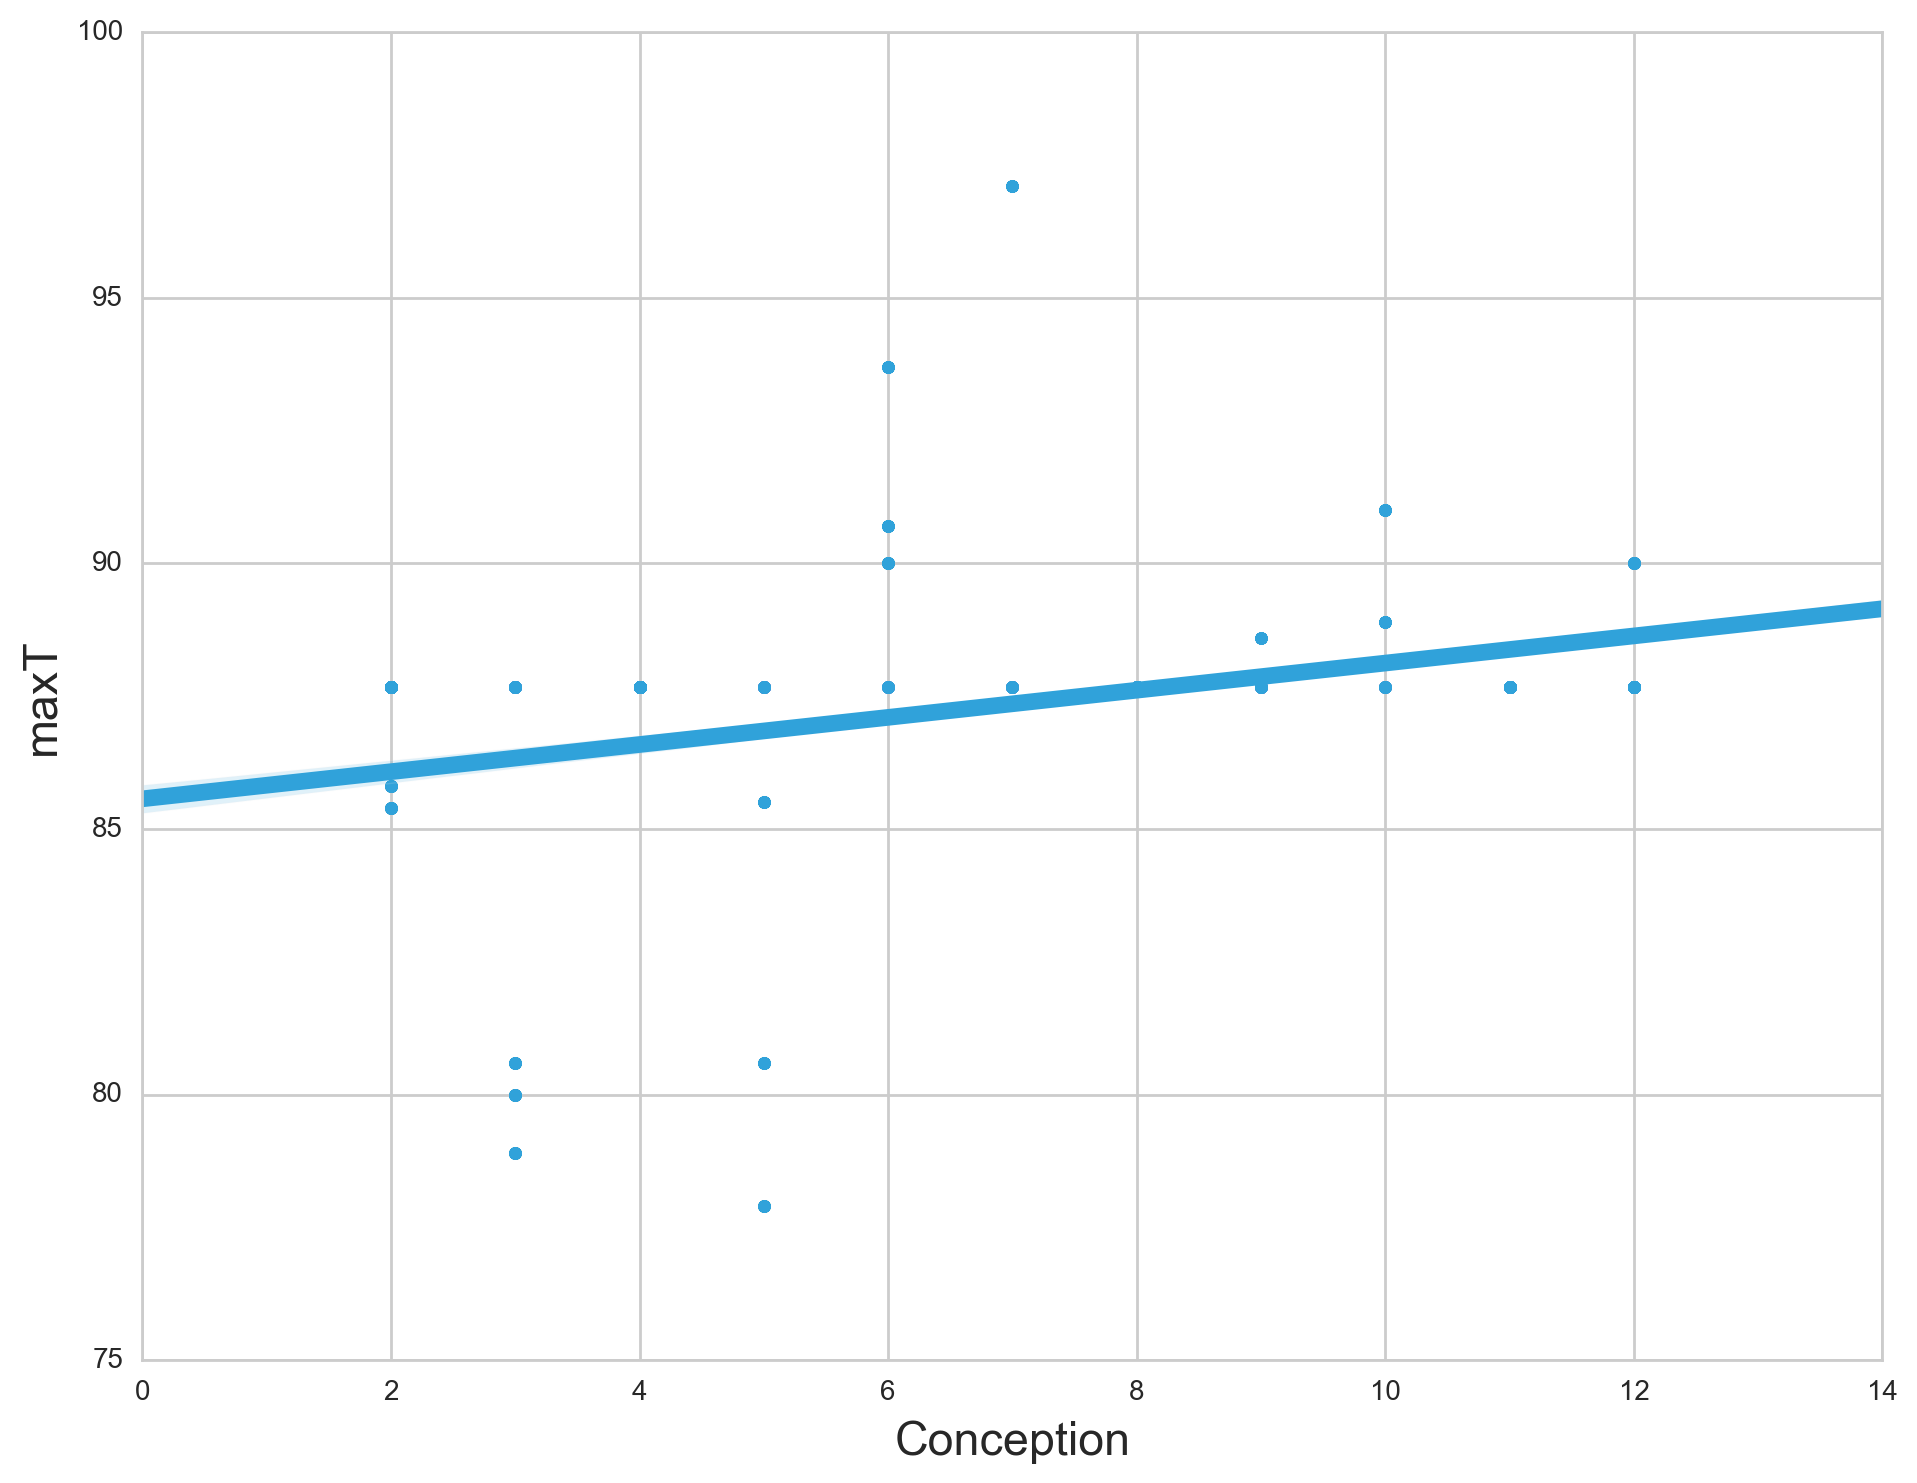

In [27]:
fig = plt.figure(figsize=(10,8))
sns.regplot(dfA['Conception'], dfA['maxT'], data=dfA)
plt.show()
#conception increases with increased temperature. PLOT TIME SERIES AND SEE IF THERE IS A DIP ANYWHERE

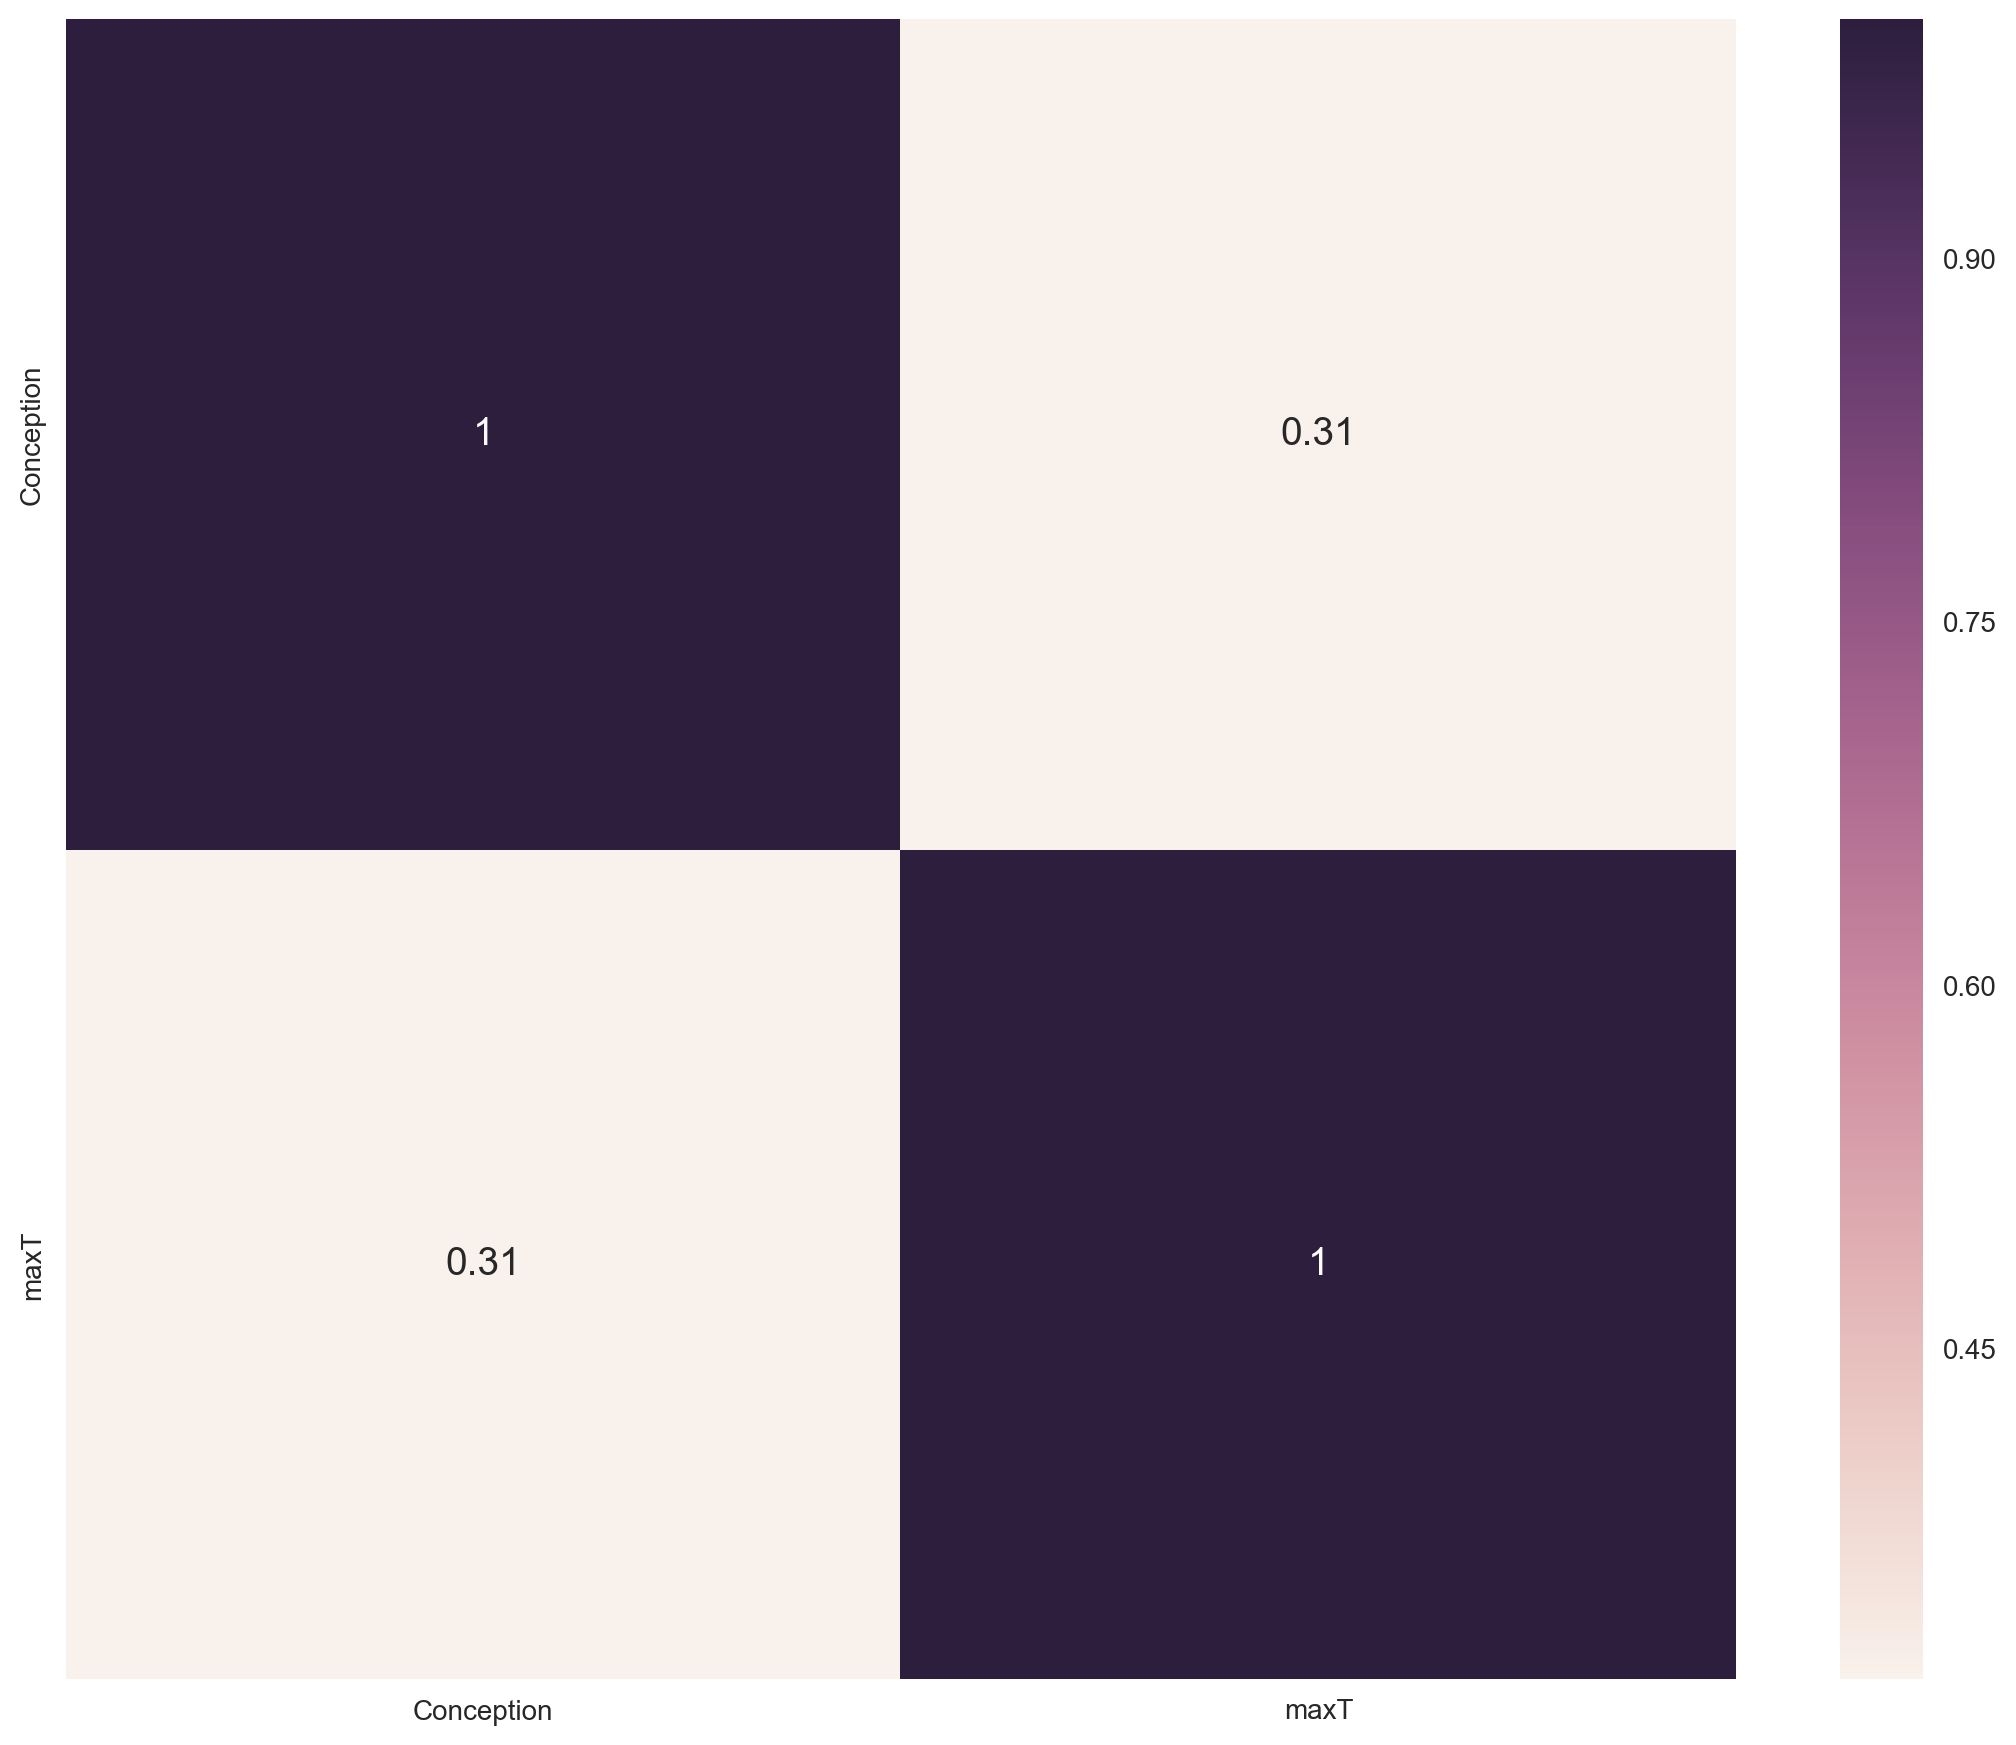

In [28]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.heatmap(dfA[['Conception', 'maxT']].corr(),annot=True, ax=ax)
plt.show()
#This shows weak positive correlation between max temperature and conception

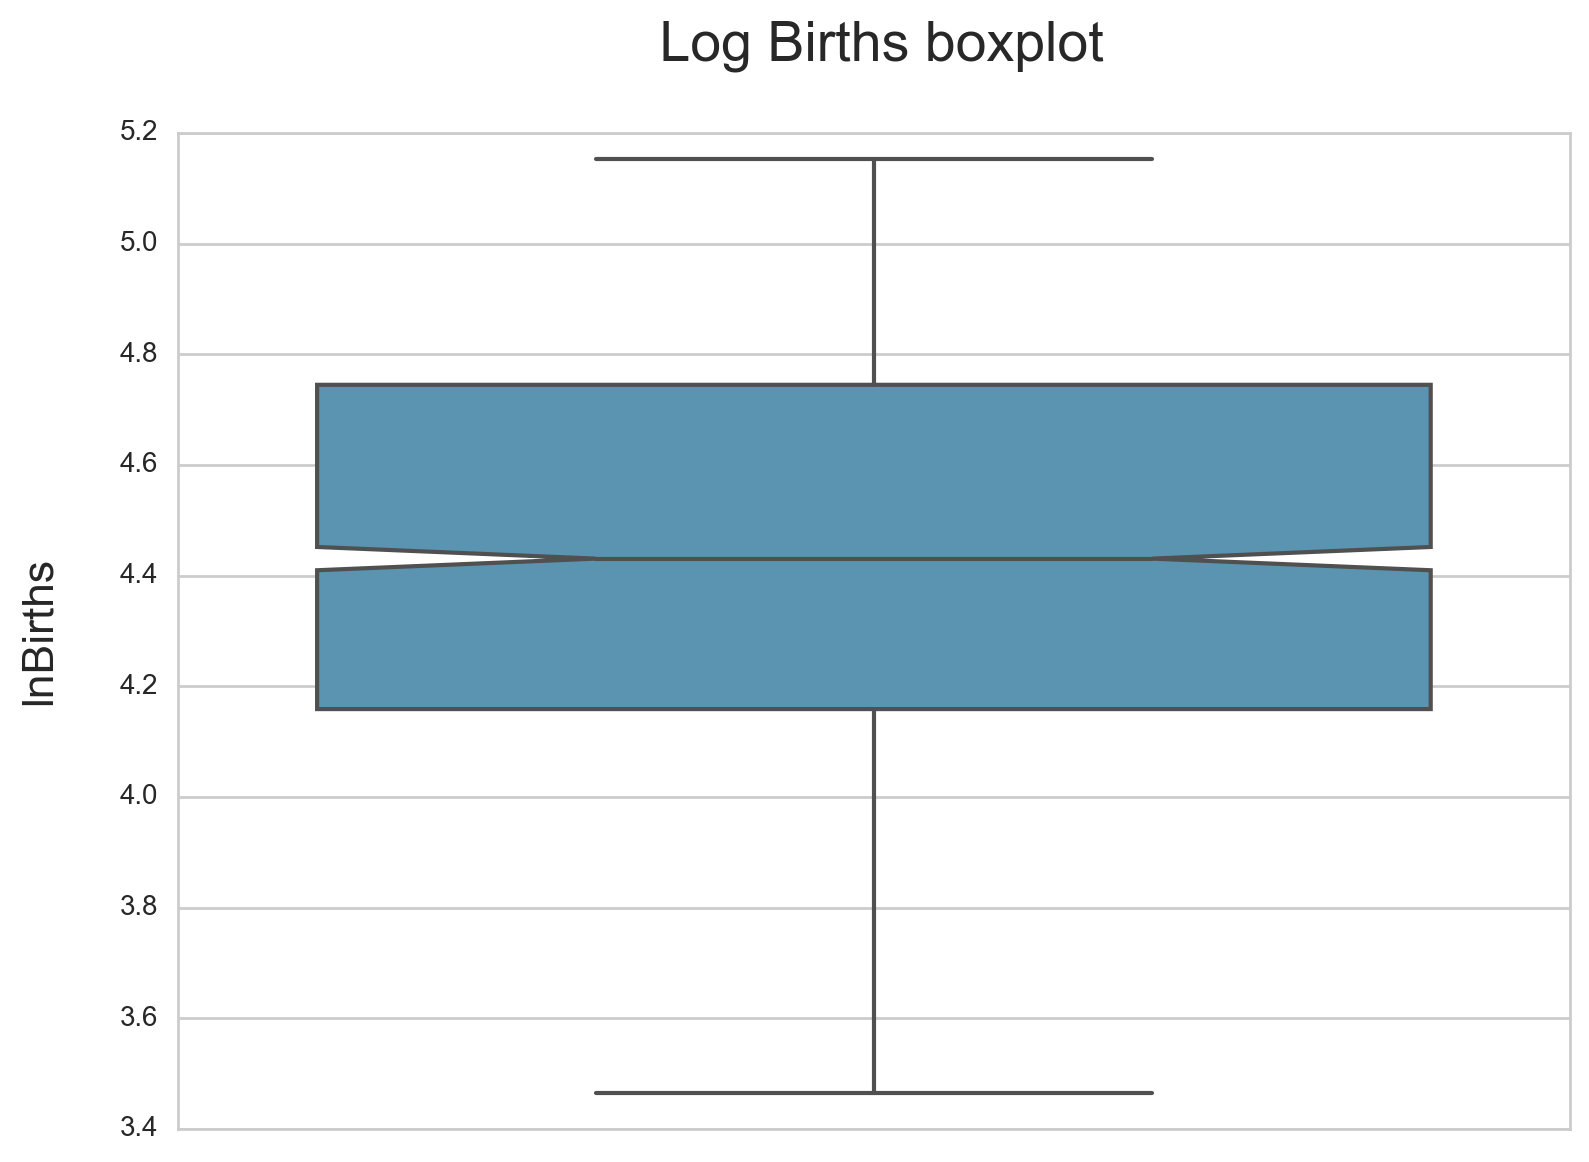

In [29]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(dfA.lnBirths, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('lnBirths\n', fontsize=16)
ax.set_title(' Log Births boxplot\n', fontsize=20)

plt.show()

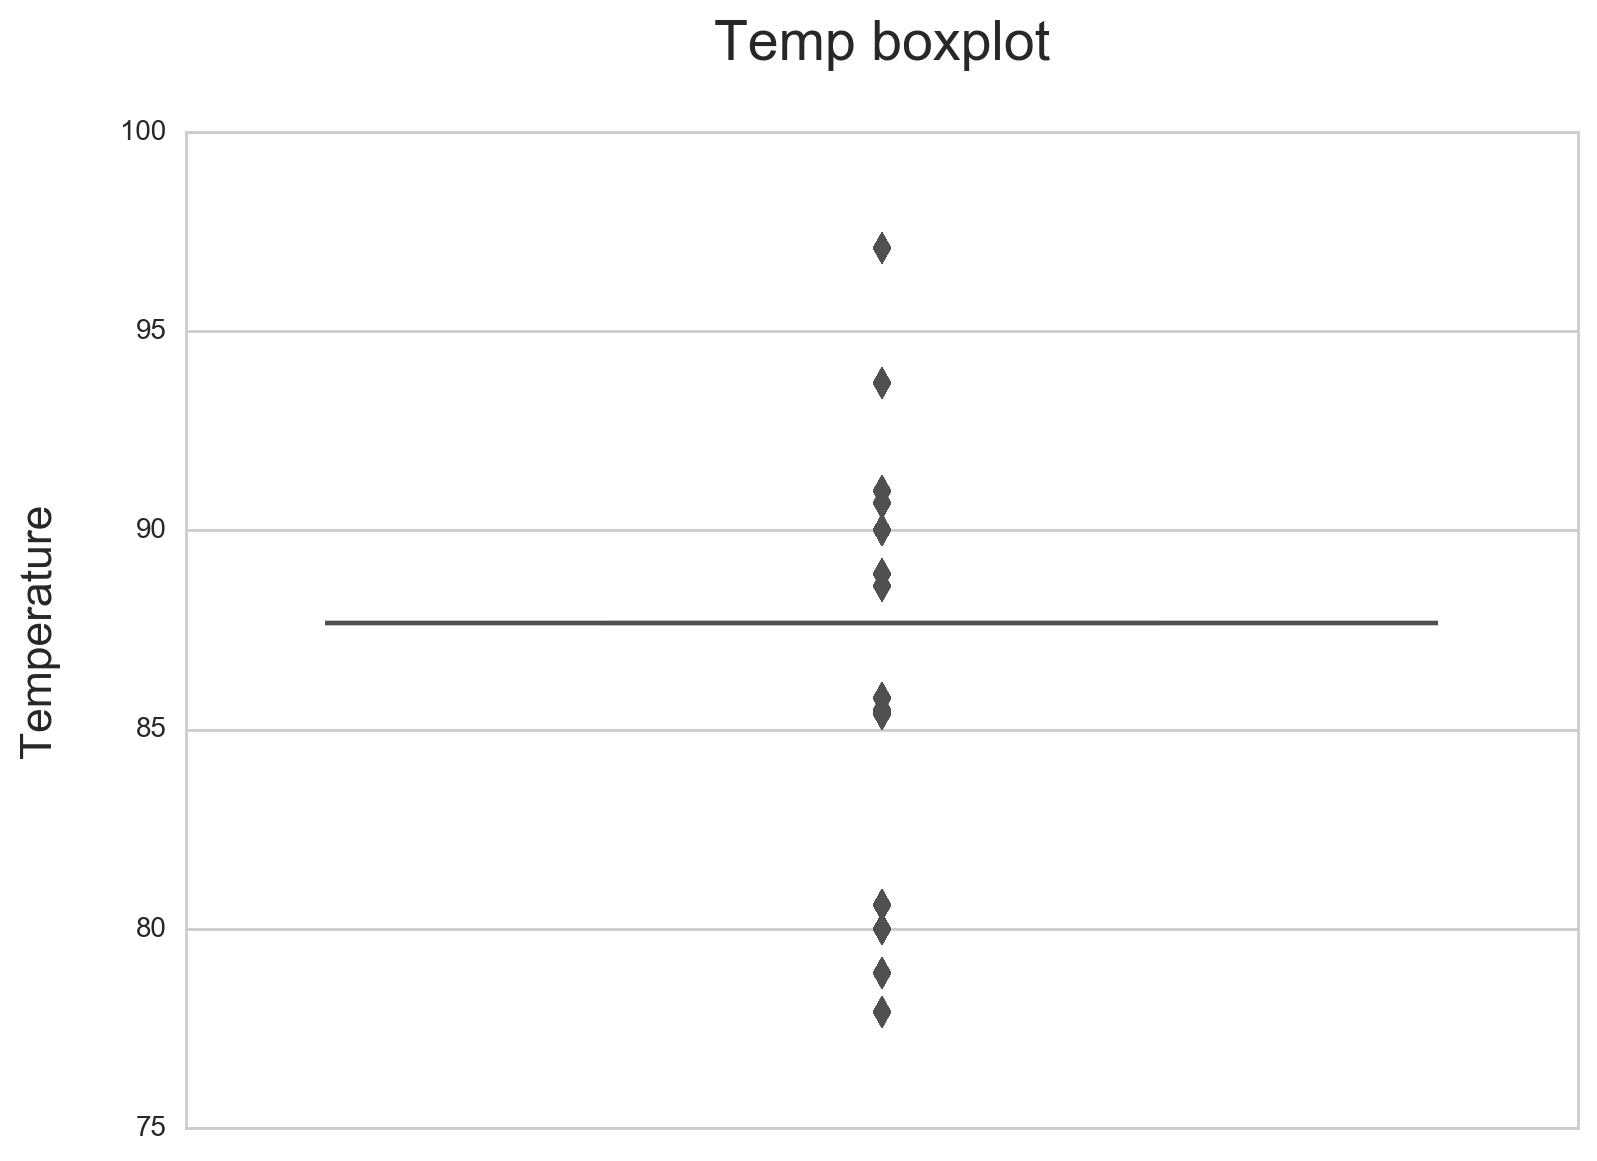

In [30]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(dfA.maxT, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Temperature\n', fontsize=16)
ax.set_title('Temp boxplot\n', fontsize=20)

plt.show()
#There appears to have outliers here. This could be because majority of the missing temperature information was replaced by mean. 
#Dhaka, Bangladesh does not have good data for their monthly average temperature and it was noticed that they obtain termperature
#information sporadically. This most of the missing values were replaced by mean. Temperatures cannot be logged. 

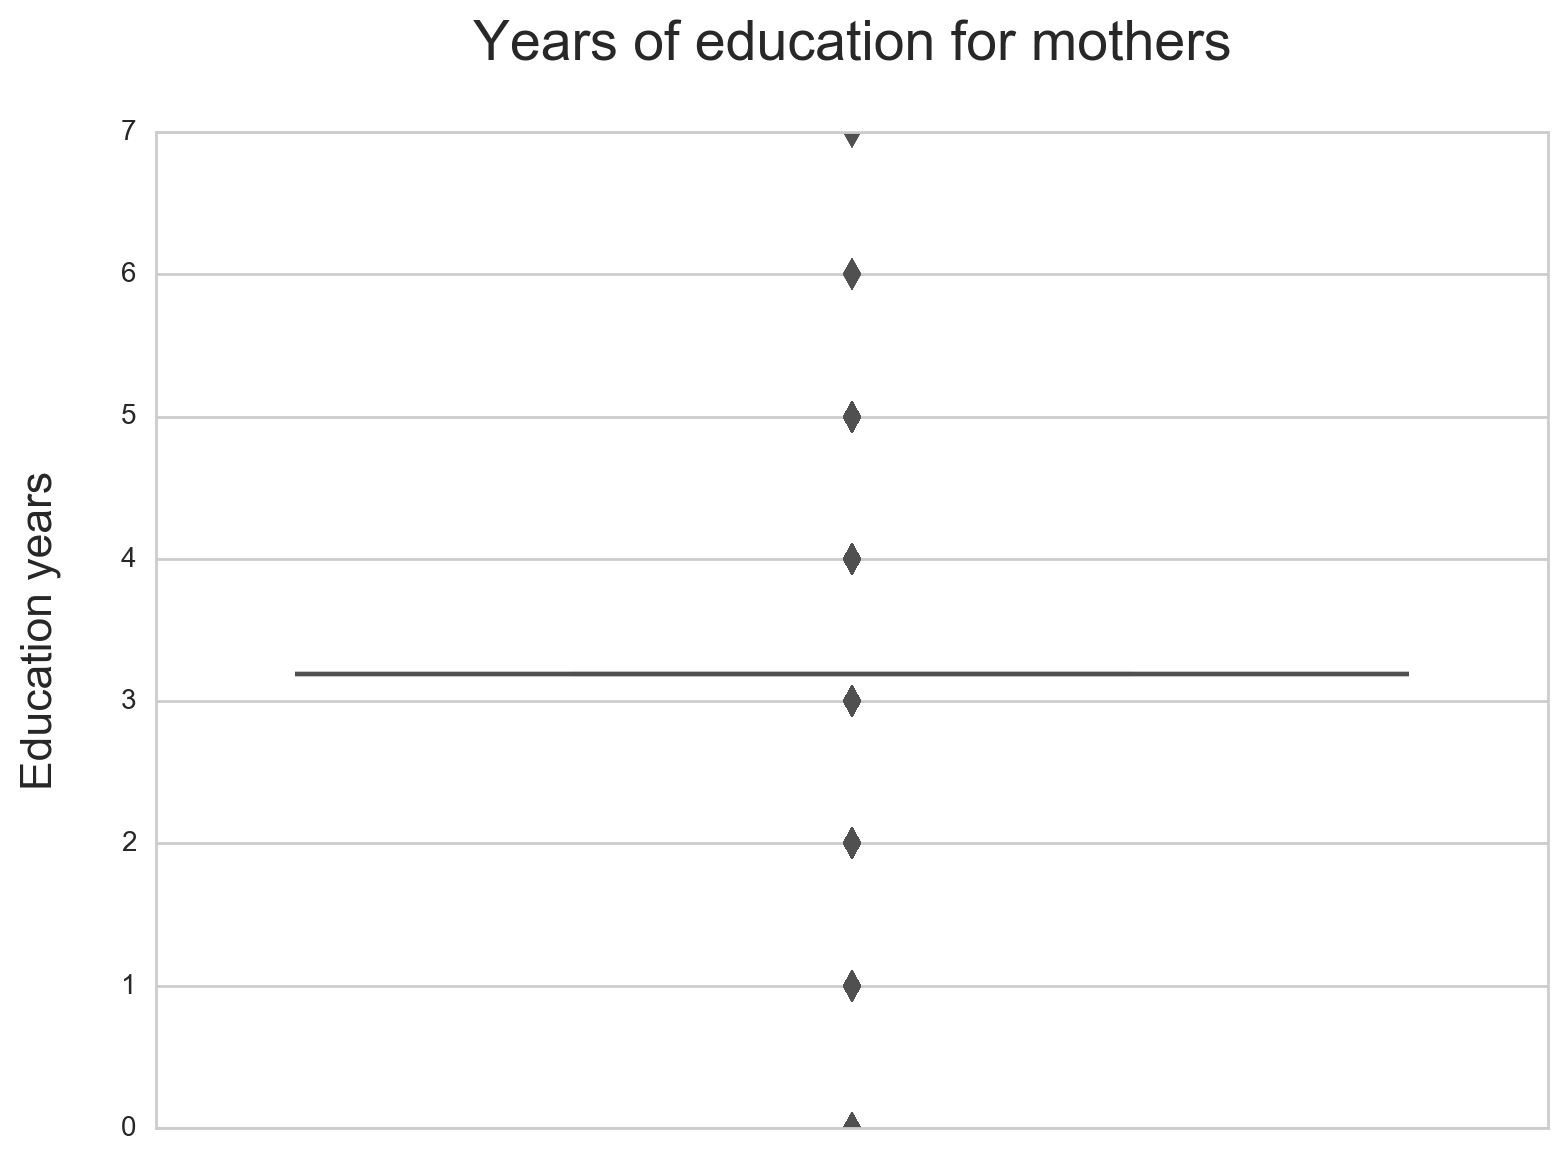

In [31]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(dfA.yrsofedu, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Education years\n', fontsize=16)
ax.set_title('Years of education for mothers\n', fontsize=20)

plt.show()
#Outliers are present this is because some respondents failed to answer this question accurately. Missing values were replaced with means.

In [32]:
#The variable yrsofedu will be logged to control for outliers. This will normalize the distribution. 
dfA['lnyrsofedu'] = dfA.yrsofedu.apply(np.log)
dfA

,Births,Breastfeeding_in_months,Conception,Highest_class_grade_child,Marriage_age_mom,Prolonged_labour,Sex of child,abortion,age,age2,...,nmbrkids,nmbrofwomen,religion,v206,workstatus,year,yrsofedu,kg1,cm1,lnyrsofedu
12,123,16.000000,2,5.00000,15.0,no,female,no,15,225,...,2,2,islam,1,agricultural work,92,3.00000,1.600000,0.990000,1.098612
13,82,30.000000,2,4.92692,11.0,no,male,no,20,400,...,4,1,islam,1,agricultural work,95,3.19347,3.000000,1.100000,1.161108
14,122,30.000000,2,5.00000,13.0,no,male,no,20,400,...,4,1,islam,1,agricultural work,91,3.19347,3.700000,1.380000,1.161108
15,173,24.000000,2,4.92692,13.0,no,male,no,16,256,...,5,1,islam,0,agricultural work,90,3.00000,2.400000,1.050000,1.098612
16,173,2.000000,2,4.92692,19.0,no,male,no,16,256,...,4,1,islam,0,agricultural work,90,3.19347,0.200000,0.440000,1.161108
17,173,18.000000,2,9.00000,8.0,yes,male,no,16,256,...,5,1,islam,0,agricultural work,90,3.00000,1.800000,0.810000,1.098612
18,121,30.000000,2,9.00000,10.0,no,female,yes,15,225,...,2,2,islam,0,agricultural work,94,5.00000,5.800000,1.350000,1.609438
19,78,13.000000,2,1.00000,11.0,no,female,no,15,225,...,5,1,islam,0,agricultural work,93,3.19347,1.300000,0.760000,1.161108
20,121,26.000000,2,4.92692,12.0,no,female,no,14,196,...,4,1,islam,0,agricultural work,94,3.19347,2.600000,1.050000,1.161108
21,84,46.000000,2,4.92692,12.0,yes,male,no,17,289,...,1,3,islam,0,agricultural work,96,3.19347,4.600000,1.080000,1.161108


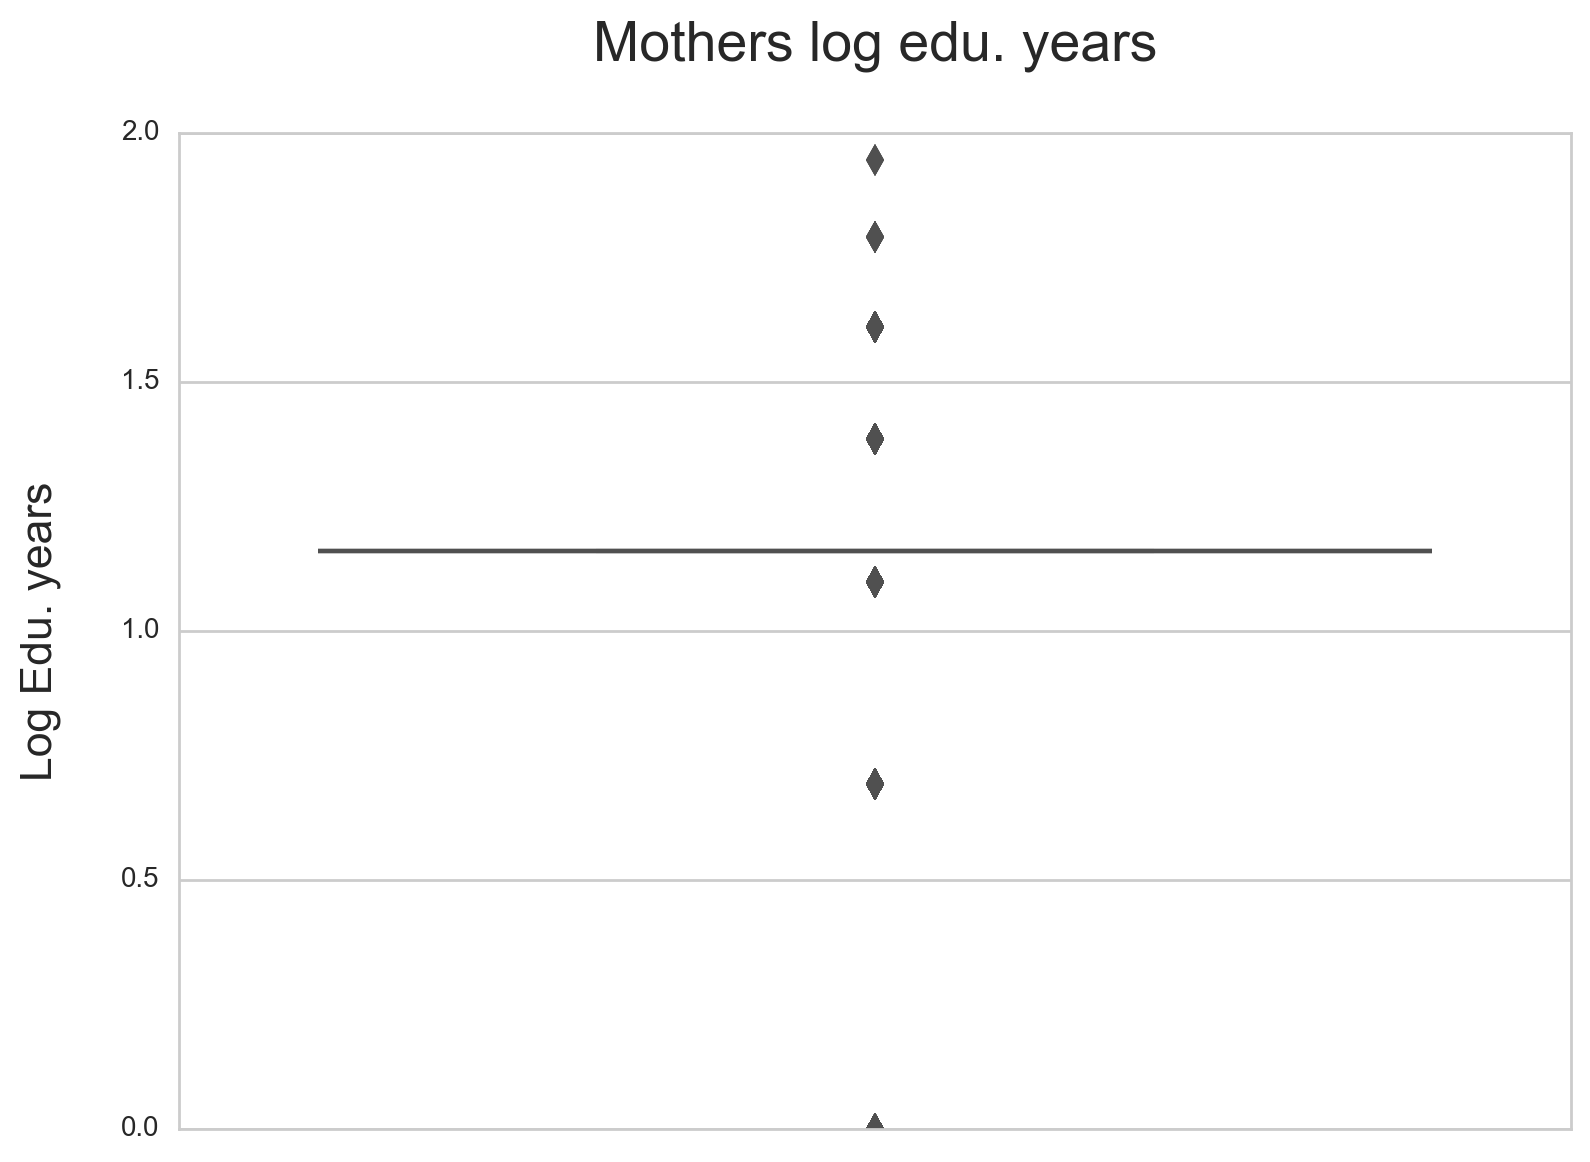

In [33]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(dfA.lnyrsofedu, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Log Edu. years\n', fontsize=16)
ax.set_title('Mothers log edu. years\n', fontsize=20)

plt.show()

In [34]:
#Obtaining summary of dataframe one more time so dummy variables can be created
dfA

,Births,Breastfeeding_in_months,Conception,Highest_class_grade_child,Marriage_age_mom,Prolonged_labour,Sex of child,abortion,age,age2,...,nmbrkids,nmbrofwomen,religion,v206,workstatus,year,yrsofedu,kg1,cm1,lnyrsofedu
12,123,16.000000,2,5.00000,15.0,no,female,no,15,225,...,2,2,islam,1,agricultural work,92,3.00000,1.600000,0.990000,1.098612
13,82,30.000000,2,4.92692,11.0,no,male,no,20,400,...,4,1,islam,1,agricultural work,95,3.19347,3.000000,1.100000,1.161108
14,122,30.000000,2,5.00000,13.0,no,male,no,20,400,...,4,1,islam,1,agricultural work,91,3.19347,3.700000,1.380000,1.161108
15,173,24.000000,2,4.92692,13.0,no,male,no,16,256,...,5,1,islam,0,agricultural work,90,3.00000,2.400000,1.050000,1.098612
16,173,2.000000,2,4.92692,19.0,no,male,no,16,256,...,4,1,islam,0,agricultural work,90,3.19347,0.200000,0.440000,1.161108
17,173,18.000000,2,9.00000,8.0,yes,male,no,16,256,...,5,1,islam,0,agricultural work,90,3.00000,1.800000,0.810000,1.098612
18,121,30.000000,2,9.00000,10.0,no,female,yes,15,225,...,2,2,islam,0,agricultural work,94,5.00000,5.800000,1.350000,1.609438
19,78,13.000000,2,1.00000,11.0,no,female,no,15,225,...,5,1,islam,0,agricultural work,93,3.19347,1.300000,0.760000,1.161108
20,121,26.000000,2,4.92692,12.0,no,female,no,14,196,...,4,1,islam,0,agricultural work,94,3.19347,2.600000,1.050000,1.161108
21,84,46.000000,2,4.92692,12.0,yes,male,no,17,289,...,1,3,islam,0,agricultural work,96,3.19347,4.600000,1.080000,1.161108


In [42]:
dfA['household_location'] = dfA['household_location'].map(lambda value: 0 if value == "rural" else 1 )
dfA['Prolonged_labour'] = dfA['Prolonged_labour'].map(lambda value: 0 if value == "no" else 1 )
dfA['Sex of child'] = dfA['Sex of child'].map(lambda value: 0 if value == "male" else 1 )
dfA['abortion'] = dfA['abortion'].map(lambda value: 0 if value == "no" else 1 )
dfA['b_control'] = dfA['b_control'].map(lambda value: 0 if value == "not usin" else 1 )

In [36]:
#Converting categorical value to numerical value
def religions(x):
    if x=='islam':
        return 1
    if x=='hinduism':
        return 2
    if x=='christianity':
        return 3
    if x=='buddhism':
        return 4

In [37]:
dfA['religion_type'] = dfA['religion'].apply(religions)
del dfA['religion']
dfA.head(5)

,Births,Breastfeeding_in_months,Conception,Highest_class_grade_child,Marriage_age_mom,Prolonged_labour,Sex of child,abortion,age,age2,...,nmbrkids,nmbrofwomen,v206,workstatus,year,yrsofedu,kg1,cm1,lnyrsofedu,religion_type
12,123,16.0,2,5.00000,15.0,0,1,0,15,225,...,2,2,1,agricultural work,92,3.00000,1.6,0.99,1.098612,1
13,82,30.0,2,4.92692,11.0,0,0,0,20,400,...,4,1,1,agricultural work,95,3.19347,3.0,1.10,1.161108,1
14,122,30.0,2,5.00000,13.0,0,0,0,20,400,...,4,1,1,agricultural work,91,3.19347,3.7,1.38,1.161108,1
15,173,24.0,2,4.92692,13.0,0,0,0,16,256,...,5,1,0,agricultural work,90,3.00000,2.4,1.05,1.098612,1
16,173,2.0,2,4.92692,19.0,0,0,0,16,256,...,4,1,0,agricultural work,90,3.19347,0.2,0.44,1.161108,1


In [38]:
def work(x):
    if x=='agricultural work':
        return 1
    if x=='animal raising/traid':
        return 2
    if x=='construction work':
        return 3
    if x=='domestic labour':
        return 4
    if x=='homebased manufact.':
        return 4
    if x=='not working':
        return 5
    if x=='semi-skilled serv.':
        return 3
    if x== 'business':
        return 6
    if x=='other':
        return 6

In [39]:
dfA['work_type'] = dfA['workstatus'].apply(work)
del dfA['workstatus']
dfA.head(5)

,Births,Breastfeeding_in_months,Conception,Highest_class_grade_child,Marriage_age_mom,Prolonged_labour,Sex of child,abortion,age,age2,...,nmbrkids,nmbrofwomen,v206,year,yrsofedu,kg1,cm1,lnyrsofedu,religion_type,work_type
12,123,16.0,2,5.00000,15.0,0,1,0,15,225,...,2,2,1,92,3.00000,1.6,0.99,1.098612,1,1.0
13,82,30.0,2,4.92692,11.0,0,0,0,20,400,...,4,1,1,95,3.19347,3.0,1.10,1.161108,1,1.0
14,122,30.0,2,5.00000,13.0,0,0,0,20,400,...,4,1,1,91,3.19347,3.7,1.38,1.161108,1,1.0
15,173,24.0,2,4.92692,13.0,0,0,0,16,256,...,5,1,0,90,3.00000,2.4,1.05,1.098612,1,1.0
16,173,2.0,2,4.92692,19.0,0,0,0,16,256,...,4,1,0,90,3.19347,0.2,0.44,1.161108,1,1.0


### Creating linear regression model 

The original regression data will be:

    X = [maxT, lnyrsofedu, age, age2, religion_type, work_type, b_control]
    y = lnBirths

In [44]:
#But before that I am running a simple regression to see significance of B Temp coefficient
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split

## Defining y and X
y, X = patsy.dmatrices("lnBirths~ maxT", data=dfA, return_type="dataframe")
y = np.ravel(y)
print (y.shape) 
print (X.shape)

(1913,)
(1913, 2)


In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)
print Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

(1339, 2) (574, 2) (1339,) (574,)


In [49]:
# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()
model = lm.fit(Xtrain, ytrain)

In [51]:
#R^2 shows poor explanatory power and the coeficient shows that each additional increase in temperature will reduce
#birth rate by 0.03. Additional features to will be added to the model to evaluate the explanatory power of the model. 
print ("R^2:", model.score(Xtrain, ytrain))
print ("Coefficients:", model.coef_)
print ("Intercept:", model.intercept_)

('R^2:', 0.056866058940759245)
('Coefficients:', array([ 0.       , -0.0313346]))
('Intercept:', 7.1561565300965793)


In [53]:
import statsmodels.formula.api as smf
lm_stats = smf.ols(formula='lnBirths ~ maxT', data=dfA).fit()
print lm_stats.summary()
#Temperature shows statically signifant result in the case. 

                            OLS Regression Results                            
Dep. Variable:               lnBirths   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     129.4
Date:                Sun, 16 Apr 2017   Prob (F-statistic):           4.67e-29
Time:                        17:36:39   Log-Likelihood:                -702.72
No. Observations:                1913   AIC:                             1409.
Df Residuals:                    1911   BIC:                             1421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2772      0.252     28.928      0.0

In [67]:
dfA.isnull().sum()

Births                         0
Breastfeeding_in_months        0
Conception                     0
Highest_class_grade_child      0
Marriage_age_mom               0
Prolonged_labour               0
Sex of child                   0
abortion                       0
age                            0
age2                           0
b_control                      0
bidx                           0
birthcntrl                     0
bord                           0
cm                             0
contraception1                 0
education                      0
education1                     0
edustatus                      0
electricity                   10
extremeT                       0
hh_id                          0
hh_yrsofedu                    0
hhoccupation                   1
hhsize                         0
household_location             0
kg                             0
literacy                       7
livingkids                     0
lnBirths                       0
location  

In [72]:
dfA.describe().T

,count,mean,std,min,25%,50%,75%,max
Births,1913.0,88.196027,30.600523,32.000000,64.000000,84.000000,115.000000,173.000000
Breastfeeding_in_months,1913.0,20.271307,12.297191,0.000000,11.000000,20.043116,30.000000,59.000000
Conception,1913.0,6.423419,3.411695,2.000000,3.000000,6.000000,10.000000,12.000000
Highest_class_grade_child,1913.0,4.944672,1.972374,1.000000,4.926920,4.926920,5.000000,17.000000
Marriage_age_mom,1913.0,13.637738,2.705174,5.000000,12.000000,13.000000,15.000000,28.000000
Prolonged_labour,1913.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Sex of child,1913.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
abortion,1913.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
age,1913.0,16.858860,2.917797,10.000000,15.000000,16.000000,18.000000,31.000000
age2,1913.0,292.730267,109.962871,100.000000,225.000000,256.000000,324.000000,961.000000


In [60]:
#Linear regression model with additional variables
y1, X1 = patsy.dmatrices("lnBirths ~  maxT+ lnyrsofedu+ age+ religion_type+ work_type+ b_control", data=dfA, return_type="dataframe")
y1 = np.ravel(y1)
print (y1.shape)
print ("\n=====\n")
print (X1.shape)

(1896,)

=====

(1896, 7)


In [74]:
#Set df as panel. 
dfa = dfA.set_index(['hh_id'])

In [75]:
dfa.head(5)

,Births,Breastfeeding_in_months,Conception,Highest_class_grade_child,Marriage_age_mom,Prolonged_labour,Sex of child,abortion,age,age2,...,nmbrkids,nmbrofwomen,v206,year,yrsofedu,kg1,cm1,lnyrsofedu,religion_type,work_type
hh_id,,,,,,,,,,,,,,,,,,,,,
134,123,16.0,2,5.00000,15.0,1,1,1,15,225,...,2,2,1,92,3.00000,1.6,0.99,1.098612,1,1.0
38,82,30.0,2,4.92692,11.0,1,1,1,20,400,...,4,1,1,95,3.19347,3.0,1.10,1.161108,1,1.0
38,122,30.0,2,5.00000,13.0,1,1,1,20,400,...,4,1,1,91,3.19347,3.7,1.38,1.161108,1,1.0
120,173,24.0,2,4.92692,13.0,1,1,1,16,256,...,5,1,0,90,3.00000,2.4,1.05,1.098612,1,1.0
67,173,2.0,2,4.92692,19.0,1,1,1,16,256,...,4,1,0,90,3.19347,0.2,0.44,1.161108,1,1.0


In [76]:
dfa['work_type'] = dfa.groupby(level=0)['work_type'].transform( lambda x: x.fillna(x.mean()))

In [77]:
#work_type missing values need to be replaced. 
dfA.isnull().sum()

Births                         0
Breastfeeding_in_months        0
Conception                     0
Highest_class_grade_child      0
Marriage_age_mom               0
Prolonged_labour               0
Sex of child                   0
abortion                       0
age                            0
age2                           0
b_control                      0
bidx                           0
birthcntrl                     0
bord                           0
cm                             0
contraception1                 0
education                      0
education1                     0
edustatus                      0
electricity                   10
extremeT                       0
hh_id                          0
hh_yrsofedu                    0
hhoccupation                   1
hhsize                         0
household_location             0
kg                             0
literacy                       7
livingkids                     0
lnBirths                       0
location  

In [62]:
X1train, X1test, y1train, y1test = train_test_split(X1, y1, test_size=0.30)
print ("Shape of X train:", X1train.shape) 
print ("Shape of y train:", y1train.shape)
print ("\n=====\n")
print ("Shape of X test:", X1test.shape)
print ("Shape of y test:", y1test.shape)

('Shape of X train:', (1327, 7))
('Shape of y train:', (1327,))

=====

('Shape of X test:', (569, 7))
('Shape of y test:', (569,))


In [78]:
lm_stats_1 = smf.ols(formula='lnBirths ~  maxT+ yrsofedu + age+ age2 +religion_type++b_control', data=dfA).fit()
print (lm_stats_1.summary())

                            OLS Regression Results                            
Dep. Variable:               lnBirths   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     23.67
Date:                Sun, 16 Apr 2017   Prob (F-statistic):           4.05e-27
Time:                        18:08:58   Log-Likelihood:                -696.64
No. Observations:                1913   AIC:                             1407.
Df Residuals:                    1906   BIC:                             1446.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.4430      0.320     23.282